In [2]:
DET_NICKNAME = 'LW_f277w-f356w-f444w'
# DET_NICKNAME = 'SW_f150w-f200w'
KERNEL = 'f444w'
APERSIZE = '0_7'

import sys, os

DIR_CONFIG = '/Volumes/External1/Projects/Current/UNCOVER/scripts/'
sys.path.insert(0, DIR_CONFIG)
from config import DIR_CATALOGS, DET_TYPE, FILTERS, TARGET_ZP, TRANSLATE_FNAME, DIR_OUTPUT

FULLDIR_CATALOGS = os.path.join(DIR_CATALOGS, f'{DET_NICKNAME}_{DET_TYPE}/{KERNEL}/')
translate_file = os.path.join(DIR_CONFIG, TRANSLATE_FNAME)
print(FILTERS)


['f435w', 'f606w', 'f814w', 'f105w', 'f125w', 'f140w', 'f150w', 'f160w', 'f200w', 'f277w', 'f356w', 'f444w']


In [4]:
import eazy
print(eazy.__version__)

# Symlink templates & filters from the eazy-code repository
print('EAZYCODE = '+os.getenv('EAZYCODE'))

eazy.symlink_eazy_inputs() 

params = {}

params['CATALOG_FILE'] = os.path.join(FULLDIR_CATALOGS, f'{DET_NICKNAME}_K{KERNEL}_SCIREADY_{APERSIZE}_CATALOG.fits')
params['MAIN_OUTPUT_FILE'] = os.path.join(FULLDIR_CATALOGS, f'{DET_NICKNAME}_K{KERNEL}_SCIREADY_{APERSIZE}_CATALOG.eazypy')

params['APPLY_PRIOR'] = 'n'
params['PRIOR_ABZP'] = TARGET_ZP
params['MW_EBV'] = 0.0
params['CAT_HAS_EXTCORR'] = 'y'

params['Z_MAX'] = 30
params['Z_STEP'] = 0.1

params['TEMPLATES_FILE'] = 'templates/fsps_full/tweak_fsps_QSF_12_v3.param'

params['VERBOSITY'] = 1
ez = eazy.photoz.PhotoZ(translate_file=translate_file,
                              zeropoint_file=None, params=params,
                              load_prior=False, load_products=True)

0.5.2.dev45
EAZYCODE = /Users/jweaver/Projects/Common/software/eazy-photoz
/Users/jweaver/Projects/Common/software/eazy-py/eazy/data/templates -> ./templates
/Users/jweaver/Projects/Common/software/eazy-py/eazy/data/filters/FILTER.RES.latest -> ./FILTER.RES.latest
Read default param file: /Users/jweaver/Projects/Common/software/eazy-py/eazy/data/zphot.param.default
Read CATALOG_FILE: /Volumes/External1/Projects/Current/UNCOVER/data/vTest/catalogs/LW_f277w-f356w-f444w_noise-equal/f444w/LW_f277w-f356w-f444w_Kf444w_SCIREADY_0_7_CATALOG.fits
   >>> NOBJ = 10771
f_f435w e_f435w (233): hst/ACS_update_sep07/wfc_f435w_t81.dat
f_f606w e_f606w (236): hst/ACS_update_sep07/wfc_f606w_t81.dat
f_f814w e_f814w (239): hst/ACS_update_sep07/wfc_f814w_t81.dat
f_f105w e_f105w (202): hst/wfc3/IR/f105w.dat
f_f125w e_f125w (203): hst/wfc3/IR/f125w.dat
f_f140w e_f140w (204): hst/wfc3/IR/f140w.dat
f_f150w e_f150w (365): jwst_nircam_f150w
f_f160w e_f160w (205): hst/wfc3/IR/f160w.dat
f_f200w e_f200w (366): jwst_n

100%|██████████| 12/12 [00:07<00:00,  1.57it/s]


Template   0: tweak_fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: tweak_fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: tweak_fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: tweak_fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: tweak_fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: tweak_fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: tweak_fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: tweak_fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: tweak_fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: tweak_fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: tweak_fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: tweak_fsps_QSF_12_v3_012.dat (NZ=1).
Process templates: 8.303 s


35it [00:00, 461.63it/s]


Load products: /Volumes/External1/Projects/Current/UNCOVER/data/vTest/catalogs/LW_f277w-f356w-f444w_noise-equal/f444w/LW_f277w-f356w-f444w_Kf444w_SCIREADY_0_7_CATALOG.eazypy.zout.fits
 ... Fit templates at zout[z_phot] 
fit_best: 1.3 s (n_proc=1,  NOBJ=9337)


UVJ classification

In [5]:
import numpy as np

u_v = -2.5*np.log10(ez.zout['restU'] / ez.zout['restV'])
v_j = -2.5*np.log10(ez.zout['restV'] / ez.zout['restJ'])

def uvj_sel(v_j):
    ret = 0.72*v_j + 0.75
    ret[v_j >= 1.6] = 1E20
    ret[v_j < 0.9] = 1.4
    return ret

clas = np.nan * np.ones(len(ez.zout), dtype=int)
out = uvj_sel(v_j)
clas[u_v >= out] = 1 # QG
clas[u_v < out] = 0 # SF
clas[(u_v > 2.4) | (u_v < 0.0) | (v_j < -0.6)  | (v_j > 2.0)] = -1
clas[np.isnan(u_v) | np.isnan(v_j)] = -1

ez.zout['u_v'] = u_v
ez.zout['v_j'] = v_j
ez.zout['uvj_class'] = clas


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd f

Total Sample Properties

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log10
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log10


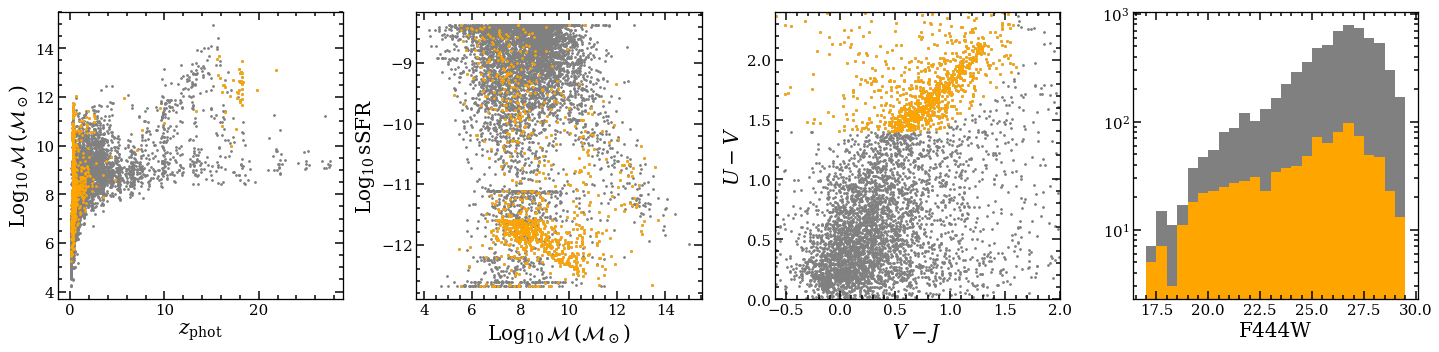

In [6]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(4*5, 5))

qg = ez.zout['uvj_class'] == 1
sanity = ez.cat['use_phot'] == 1

# z vs. M
axes[0].scatter(ez.zout['z_phot'][sanity], np.log10(ez.zout['mass'][sanity]), s=3, c='grey')
axes[0].scatter(ez.zout['z_phot'][qg & sanity], np.log10(ez.zout['mass'][qg & sanity]), s=3, c='orange')
axes[0].set(xlabel='$z_{\\rm phot}$', ylabel='Log$_{10}\,\mathcal{M}\,(\mathcal{M}_\odot)$')

# M vs. SFR
axes[1].scatter(np.log10(ez.zout['mass'][sanity]), np.log10(ez.zout['sfr']/ez.zout['mass'])[sanity], s=3, c='grey')
axes[1].scatter(np.log10(ez.zout['mass'][qg & sanity]), np.log10(ez.zout['sfr'][qg & sanity]/ez.zout['mass'][qg & sanity]), s=3, c='orange')
axes[1].set(xlabel='Log$_{10}\,\mathcal{M}\,(\mathcal{M}_\odot)$', ylabel='Log$_{10}\,{\\rm sSFR}}\,(\mathcal{M}_\odot\,{\\rm yr}^{-1})$')

# UVJ
axes[2].scatter(ez.zout['v_j'][sanity], ez.zout['u_v'][sanity], s=3, c='grey')
axes[2].scatter(ez.zout['v_j'][qg & sanity], ez.zout['u_v'][qg & sanity], s=3, c='orange')
axes[2].set(xlabel='$V-J$', ylabel='$U-V$', xlim=(-0.6, 2.0), ylim=(0, 2.4))

# F444W
bins = np.arange(17, 30, 0.5)
axes[3].hist(TARGET_ZP - 2.5*np.log10(ez.cat['f_f444w'])[sanity], bins=bins, color='grey')
axes[3].hist(TARGET_ZP - 2.5*np.log10(ez.cat['f_f444w'])[qg & sanity], bins=bins, color='orange')
axes[3].set(xlabel='F444W')
axes[3].semilogy()

fig.tight_layout()



Sample Selection

In [20]:
Z_RANGE = (0, 20)
MASS_RANGE = (1e7, 1e12)
SFR_RANGE = (0, 1e31)
MAG_RANGE = (20, 28)
MAG_FILT = 'f444w'
RCHISQ_RANGE = (0, 10)
UVJ_TYPE = (0, 1, -1) # 0 - SFG, 1 - QG
USE_PHOT = 1
NUSEFILT = 8
MAX_ZWIDTH = 1000

def select_between(x, lo, hi):
    return (x > lo) & (x <= hi)

selection = np.zeros(len(ez.cat), dtype=bool)
selection[select_between(ez.zout['z_phot'], Z_RANGE[0], Z_RANGE[1])
          & select_between(ez.zout['mass'], MASS_RANGE[0], MASS_RANGE[1]) 
          & select_between(ez.zout['sfr'], SFR_RANGE[0], SFR_RANGE[1])
          & select_between(TARGET_ZP - 2.5*np.log10(ez.cat[f'f_{MAG_FILT}']), MAG_RANGE[0], MAG_RANGE[1]) 
          & select_between(ez.zout[f'z_phot_chi2']/ez.zout['nusefilt'], RCHISQ_RANGE[0], RCHISQ_RANGE[1]) 
          & np.isin(ez.zout['uvj_class'], UVJ_TYPE)
          & (ez.cat['use_phot'] == USE_PHOT)
          & (ez.zout['nusefilt'] >= NUSEFILT)
          & ((ez.zout['z840'] - ez.zout['z160']) <= MAX_ZWIDTH)
          # & (ez.cat['z_spec'] > 0) & ((abs(ez.zout['z_phot'] - ez.cat['z_spec']) > 0.15 * (1 + ez.cat['z_spec'])))
            ] = True

print(f'Selection contains {selection.sum()} objects')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log10
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


Selection contains 2186 objects


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log10
/usr/local/anaconda3/li

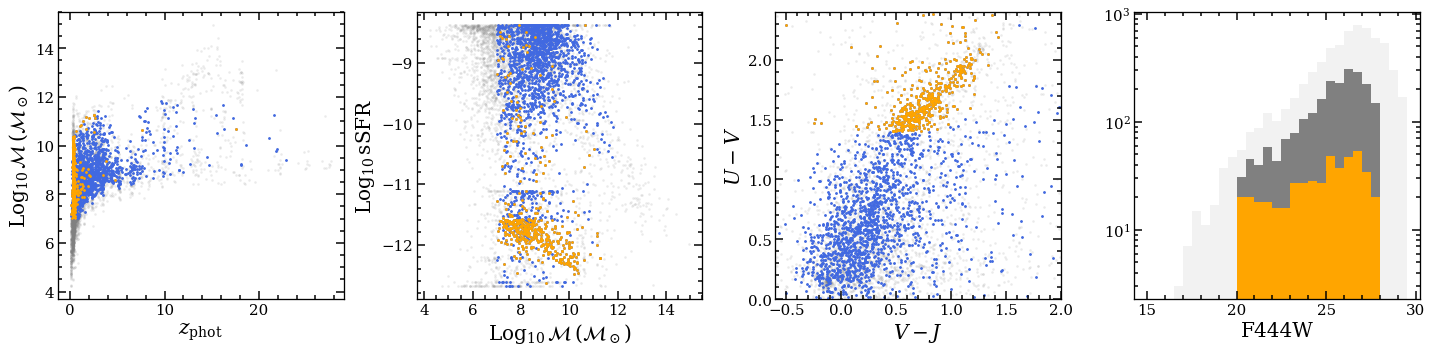

In [21]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(4*5, 5))

qg = ez.zout['uvj_class'] == 1
sanity = ez.cat['use_phot'] == 1

# z vs. M
axes[0].scatter(ez.zout['z_phot'][sanity], np.log10(ez.zout['mass'][sanity]), s=3, alpha=0.1, c='grey')
axes[0].scatter(ez.zout['z_phot'][selection], np.log10(ez.zout['mass'][selection]), s=3, c='royalblue')
axes[0].scatter(ez.zout['z_phot'][qg & selection], np.log10(ez.zout['mass'][qg & selection]), s=3, c='orange')
axes[0].set(xlabel='$z_{\\rm phot}$', ylabel='Log$_{10}\,\mathcal{M}\,(\mathcal{M}_\odot)$')

# M vs. SFR
axes[1].scatter(np.log10(ez.zout['mass'][sanity]), np.log10(ez.zout['sfr']/ez.zout['mass'])[sanity], s=3, alpha=0.1, c='grey')
axes[1].scatter(np.log10(ez.zout['mass'][selection]), np.log10(ez.zout['sfr']/ez.zout['mass'])[selection], s=3, c='royalblue')
axes[1].scatter(np.log10(ez.zout['mass'][qg & selection]), np.log10(ez.zout['sfr'][qg & selection]/ez.zout['mass'][qg & selection]), s=3, c='orange')
axes[1].set(xlabel='Log$_{10}\,\mathcal{M}\,(\mathcal{M}_\odot)$', ylabel='Log$_{10}\,{\\rm sSFR}}\,(\mathcal{M}_\odot\,{\\rm yr}^{-1})$')

# UVJ
axes[2].scatter(ez.zout['v_j'][sanity], ez.zout['u_v'][sanity], s=3, alpha=0.1, c='grey')
axes[2].scatter(ez.zout['v_j'][selection], ez.zout['u_v'][selection], s=3, c='royalblue')
axes[2].scatter(ez.zout['v_j'][qg & selection], ez.zout['u_v'][qg & selection], s=3, c='orange')
axes[2].set(xlabel='$V-J$', ylabel='$U-V$', xlim=(-0.6, 2.0), ylim=(0, 2.4))

# F444W
bins = np.arange(15, 30, 0.5)
axes[3].hist(TARGET_ZP - 2.5*np.log10(ez.cat['f_f444w'])[sanity], bins=bins, alpha=0.1, color='grey')
axes[3].hist(TARGET_ZP - 2.5*np.log10(ez.cat['f_f444w'])[selection], bins=bins, color='grey')
axes[3].hist(TARGET_ZP - 2.5*np.log10(ez.cat['f_f444w'])[qg & selection], bins=bins, color='orange')
axes[3].set(xlabel='F444W')
axes[3].semilogy()

fig.tight_layout()



In [22]:
!! open .

[]

In [25]:
from aperpy.src.webb_tools import make_cutout
import matplotlib.pyplot as plt

FORCE_AT_ZSPEC = True
SHOW_FNU = False

plt.ioff()

for obj in ez.cat[selection]:
    id = obj['id']
    idx = np.argwhere(ez.cat['id'] == id)
    chi2 = ez.chi2_best[idx][0][0]
    mass = np.log10(ez.zout['mass'][idx][0][0])
    sfr = ez.zout['sfr'][idx][0][0]
    zbest, zlo, zhi = ez.zbest[idx][0][0], ez.zout['z160'][idx][0][0], ez.zout['z840'][idx][0][0]
    info_text = f'{id} :: $z = {zbest:2.2f}$ [{zlo:2.2f} - {zhi:2.2f}] | Log('+r'$\mathcal{M}/\mathcal{M}_{\circ}$)'+f'= {mass:2.1f} SFR = {sfr:2.1f} '+r'$\mathcal{M}_{\circ}\,yr^{-1}$'
    print(info_text)
    fig, data = ez.show_fit(id, xlim=[0.4, 5], show_components=(~FORCE_AT_ZSPEC),
                              logpz=False, zr=[0,20], show_fnu=SHOW_FNU, add_label=False)

    fig.axes[0].text(0, 1.02, info_text, transform=fig.axes[0].transAxes, fontsize=15)

    if FORCE_AT_ZSPEC:
        ez.show_fit(id, xlim=[0.4, 5], show_components=False, axes=fig.axes, zshow=ez.cat['z_spec'][idx][0][0], template_color='purple',
                              logpz=False, zr=[0,20], show_fnu=SHOW_FNU, add_label=False)
    
    # fig.tight_layout()
    fig.subplots_adjust(top=0.9, bottom=0.17)
    fig.savefig(f'./SEDS/{id}_z{zbest:2.1f}_ezfit.pdf')

    # ra, dec = obj['ra'], obj['dec']
    # make_cutout(ra, dec, 1.5, id, FILTERS, DIR_OUTPUT, row=obj, write=False, include_rgb=False, redshift=zbest)
    # plt.tight_layout()
    # plt.savefig(f'./SEDS/{id}_cutout.pdf')

    # plt.pause(0.01)

580 :: $z = 1.83$ [1.69 - 1.83] | Log($\mathcal{M}/\mathcal{M}_{\circ}$)= 10.4 SFR = 19.5 $\mathcal{M}_{\circ}\,yr^{-1}$
626 :: $z = 0.48$ [0.46 - 2.85] | Log($\mathcal{M}/\mathcal{M}_{\circ}$)= 7.4 SFR = 0.1 $\mathcal{M}_{\circ}\,yr^{-1}$
637 :: $z = 0.29$ [0.24 - 0.41] | Log($\mathcal{M}/\mathcal{M}_{\circ}$)= 7.1 SFR = 0.0 $\mathcal{M}_{\circ}\,yr^{-1}$
679 :: $z = 0.48$ [0.40 - 0.54] | Log($\mathcal{M}/\mathcal{M}_{\circ}$)= 8.3 SFR = 0.0 $\mathcal{M}_{\circ}\,yr^{-1}$
689 :: $z = 0.68$ [0.54 - 0.80] | Log($\mathcal{M}/\mathcal{M}_{\circ}$)= 7.5 SFR = 0.0 $\mathcal{M}_{\circ}\,yr^{-1}$
691 :: $z = 1.27$ [1.01 - 1.82] | Log($\mathcal{M}/\mathcal{M}_{\circ}$)= 8.6 SFR = 0.0 $\mathcal{M}_{\circ}\,yr^{-1}$
694 :: $z = 3.79$ [2.25 - 14.76] | Log($\mathcal{M}/\mathcal{M}_{\circ}$)= 9.4 SFR = 0.6 $\mathcal{M}_{\circ}\,yr^{-1}$
695 :: $z = 4.54$ [1.60 - 4.92] | Log($\mathcal{M}/\mathcal{M}_{\circ}$)= 9.2 SFR = 5.1 $\mathcal{M}_{\circ}\,yr^{-1}$
697 :: $z = 2.44$ [1.31 - 5.38] | Log($\mathc

/Users/jweaver/Projects/Common/software/eazy-py/eazy/photoz.py:2734: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


824 :: $z = 1.37$ [1.28 - 1.63] | Log($\mathcal{M}/\mathcal{M}_{\circ}$)= 8.9 SFR = 0.3 $\mathcal{M}_{\circ}\,yr^{-1}$
834 :: $z = 4.93$ [4.52 - 5.11] | Log($\mathcal{M}/\mathcal{M}_{\circ}$)= 9.4 SFR = 10.2 $\mathcal{M}_{\circ}\,yr^{-1}$
845 :: $z = 13.16$ [3.78 - 14.31] | Log($\mathcal{M}/\mathcal{M}_{\circ}$)= 10.9 SFR = 97.4 $\mathcal{M}_{\circ}\,yr^{-1}$
849 :: $z = 17.25$ [16.45 - 18.63] | Log($\mathcal{M}/\mathcal{M}_{\circ}$)= 11.1 SFR = 573.5 $\mathcal{M}_{\circ}\,yr^{-1}$
884 :: $z = 9.89$ [9.71 - 10.11] | Log($\mathcal{M}/\mathcal{M}_{\circ}$)= 9.9 SFR = 34.5 $\mathcal{M}_{\circ}\,yr^{-1}$
885 :: $z = 2.34$ [1.38 - 10.29] | Log($\mathcal{M}/\mathcal{M}_{\circ}$)= 9.5 SFR = 0.0 $\mathcal{M}_{\circ}\,yr^{-1}$
890 :: $z = 0.32$ [0.26 - 0.40] | Log($\mathcal{M}/\mathcal{M}_{\circ}$)= 7.2 SFR = 0.0 $\mathcal{M}_{\circ}\,yr^{-1}$
891 :: $z = 2.92$ [2.62 - 3.09] | Log($\mathcal{M}/\mathcal{M}_{\circ}$)= 10.0 SFR = 13.1 $\mathcal{M}_{\circ}\,yr^{-1}$
892 :: $z = 2.62$ [2.51 - 2.69] 

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10


f435w 942 -0.023201808
f606w 3013 0.0009042451
f814w 2556 0.017292064
f105w 1879 0.0002612989
f125w 2435 0.0050905896
f140w 1063 -0.00055042777
f150w 3820 0.01434925
f160w 2539 0.0036162187
f200w 3910 0.01227577
f277w 5033 0.0053180316
f356w 5612 -0.0066488897
f444w 5162 0.0012816285


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10


f435w 942 -0.218382
f606w 3013 0.0194274
f814w 2556 0.4685685
f105w 1879 0.009010972
f125w 2435 0.08417923
f140w 1063 -0.012734231
f150w 3820 0.22008139
f160w 2539 0.07509846
f200w 3910 0.16586426
f277w 5033 0.08932871
f356w 5612 -0.10920945
f444w 5162 0.020696044


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10


f435w 942 0.0254879
f606w 3005 -0.0010578324
f814w 2555 -0.018650867
f105w 1876 -0.0003490154
f125w 2435 -0.005513022
f140w 1063 0.0005978068
f150w 3818 -0.015486296
f160w 2539 -0.003919172
f200w 3910 -0.013247087
f277w 5033 -0.005758696
f356w 5612 0.0072430554
f444w 5162 -0.0013906092


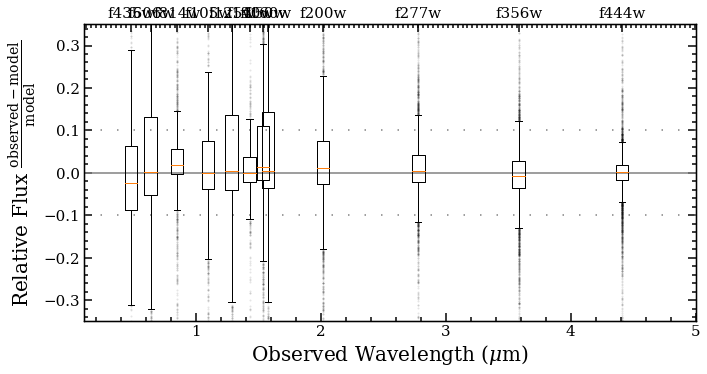

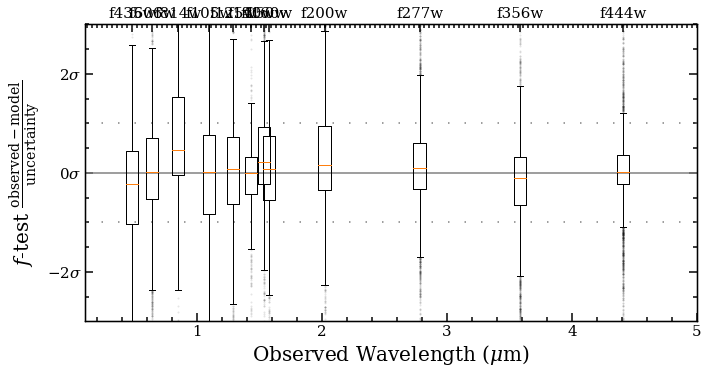

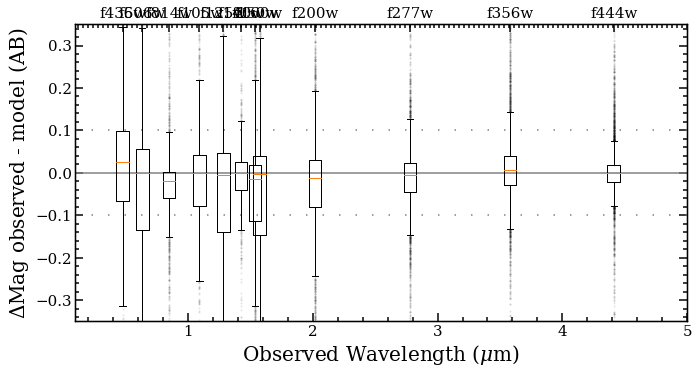

In [11]:
diff = ez.fnu - ez.fmodel
rel_diff = diff / ez.fmodel
ztest = diff / ez.efnu
dmag = -2.5*np.log10(ez.fnu/ez.fmodel)

for test, ylabel, fname in zip((rel_diff, ztest, dmag), 
                        ('Relative Flux $\\frac{\\rm{observed}-\\rm{model}}{\\rm{model}}$', '$f$-test $\\frac{\\rm{observed}-\\rm{model}}{\\rm{uncertainty}}$', '$\Delta$Mag observed - model (AB)'),
                        ('reldiff_wav', 'ztest_wav', 'dmag_wav')
                        ):

    fig, ax = plt.subplots(figsize=(10,5))
    ax.axhline(0, ls='solid', c='grey')
    
    if test is ztest:
        ax.set_ylim(-3, 3)
        hline = 1
        ax.set_yticks((-2, 0, 2), ('$-2\sigma$', '$0\sigma$', '$2\sigma$'))
    else:
        ax.set_ylim(-0.35, 0.35)
        hline = 0.1
    ax.axhline(hline, ls=(0, (1, 10)), c='grey')
    ax.axhline(-hline, ls=(0, (1, 10)), c='grey')
    axt = ax.twiny()

    test_ls = []
    for i, filt in enumerate(FILTERS):

        mag = TARGET_ZP - 2.5*np.log10(ez.fnu[:,i])
        snr = (ez.fnu/ez.efnu)[:,i]

        depth = TARGET_ZP - 2.5*np.log10( np.median(ez.fnu[:,i][(snr > 2.9) & (snr < 3.1)]) )

        sanity = ez.cat['use_phot'] == 1
        sanity &= mag <= depth
        sanity &= ~np.isnan(test[:,i])

        print(filt, np.sum(sanity), np.median(test[sanity, i]))

        test_ls.append(test[sanity, i])

    axt.boxplot(test_ls, vert=True, positions=ez.pivot*1e-4, widths=0.1, labels=FILTERS, flierprops={'marker':'.', 'markersize':2, 'alpha':0.1})
    axt.set(xlim=(0.05, 5))
    ax.set(xlim=(0.1, 5), xlabel='Observed Wavelength ($\mu$m)', ylabel=ylabel)